# Data Project: Crypto Analysis
In this project, I analysed 5 of the top crypto assets according to https://www.forbes.com/
I took a dive into their market behaviour since 2019 through the crypto bull run to the current crypto market situation 'sep-2022'. It is worth to know the relationships between the behaviour of these assets and the risk to return factor which is an important information which a crypto investor should know. 

In [2]:
# Import all the libraries 

import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [3]:
#import visualization libraries

import seaborn as sns
sns.set_style(style='whitegrid' )
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import web reader to read crypto assets 

from fastquant import get_crypto_data

In [5]:
from datetime import datetime

In [6]:
#created dictionary for the crypto asseet names as key and the pairs under review as the dictionary values 

crypto_list = {'BTC':'BTC/USDT', 'ETH':'ETH/USDT', 'BNB':'BNB/USDT', 'SOL':'SOL/USDT', 'DOGE':'DOGE/USDT'} 
start = '2019-03-01'
end = '2022-09-19'

In [7]:
#created dataframes  

for crypto, pair in crypto_list.items():
    globals()[crypto] = get_crypto_data(pair,start,end )

The Average close price between 2019-03-01 and 2022-09-19 is: 24829.86


The Maximum close price between 2019-03-01 and 2022-09-19 is: 67525.83


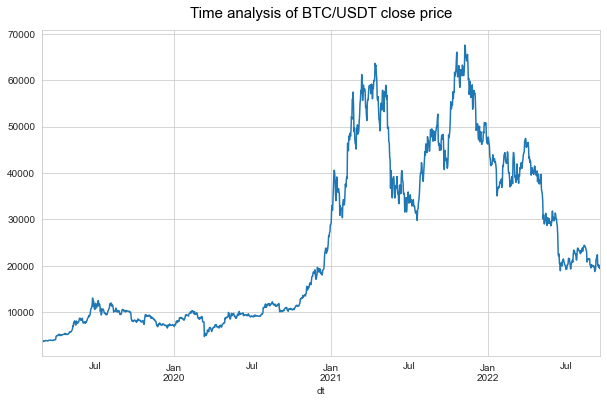

In [8]:
#plotted close price 
plt.figure(figsize=(10,6))
BTC.close.plot()
plt.title('Time analysis of BTC/USDT close price', fontsize = 15, y=1.02,color='black')

#got average and max close price
close_price = BTC.close.mean()
BTC_close_max = BTC.close.max()

print('The Average close price between {} and {} is: {}'.format(start, end, round(close_price,2 )))
print('\n')
print('The Maximum close price between {} and {} is: {}'.format(start, end, BTC_close_max ))


The Average volume traded between 2019-03-01 and 2022-09-19 is: 70459.42


The Maximum volume traded between 2019-03-01 and 2022-09-19 is: 431915


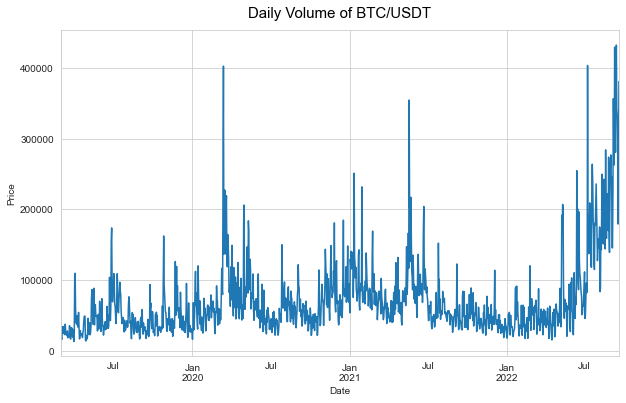

In [9]:
#plotted daily volume
plt.figure(figsize=(10,6))
BTC.volume.plot()
plt.title("Daily Volume of BTC/USDT", fontsize=15,y=1.02, color='black')

# labelled axis
plt.xlabel('Date')
plt.ylabel('Price')

#got average volume and max volume 
volume = BTC.volume.mean()
max_volume = BTC.volume.max()

print('The Average volume traded between {} and {} is: {}'.format(start, end, round(volume,2)))
print('\n')
print('The Maximum volume traded between {} and {} is: {}'.format(start, end, round(max_volume)))

In [10]:
#created my moving average(50days and 100days) columns 
daily_ma = [50,100]

#added the moving averages columns to DataFrames
for ma in daily_ma:
    cols = '{} days MA'.format(ma)
    BTC[cols] = BTC.close.rolling(ma).mean()
    ETH[cols] = ETH.close.rolling(ma).mean()

Text(0.5, 1.02, 'BTC/USDT 50 and 100 SMAs')

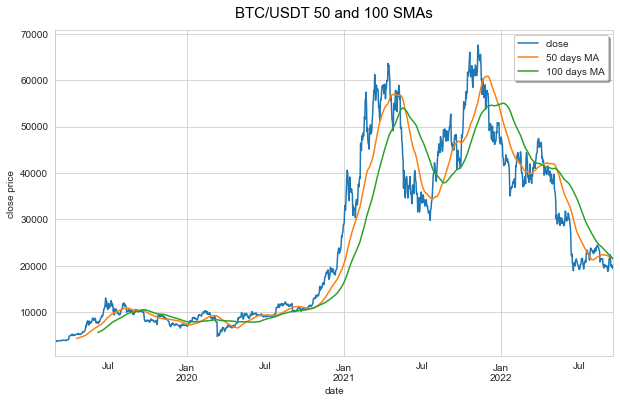

In [11]:
#plotted the close price along with the moving averages

BTC[['close', '50 days MA', '100 days MA']].plot(figsize=(10,6),ylabel='close')
plt.legend(prop = {'size': 10}, frameon = True, fancybox = True, shadow = True, framealpha = 1, bbox_to_anchor=(1, 1))

#labelled axis
plt.xlabel('date', fontsize=10)
plt.ylabel('close price', fontsize=10)

plt.title('BTC/USDT 50 and 100 SMAs', fontsize=15, y=1.02, color='black')


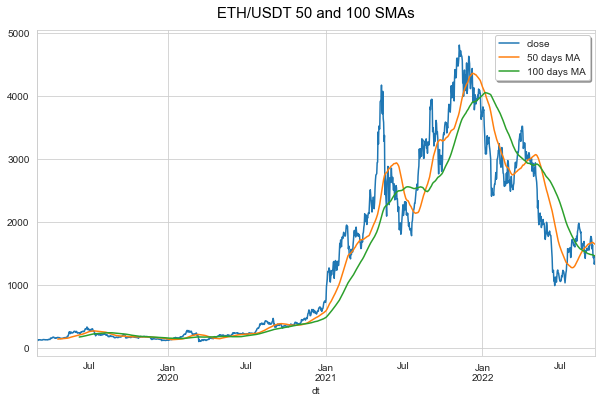

In [12]:
#ETH simple moving avarages plot

ETH[['close', '50 days MA', '100 days MA']].plot(figsize=(10,6))
plt.title('ETH/USDT 50 and 100 SMAs', fontsize=15,y=1.02, color='black')

#used legend
plt.legend(prop = {'size': 10}, frameon = True, fancybox = True, shadow = True, framealpha = 1, bbox_to_anchor=(1, 1))


### Daily Rate analysis  

1.  The max daily return information is below ↓:


                open      high       low  Daily Return
dt                                                    
2021-02-08  38795.69  46794.45  37988.89      0.195361


2.  The worst daily return information is below  ↓:


               open     high     low  Daily Return
dt                                                
2020-03-12  7934.58  7966.17  4410.0     -0.395048


3.  The Average daily return is: 0.00204


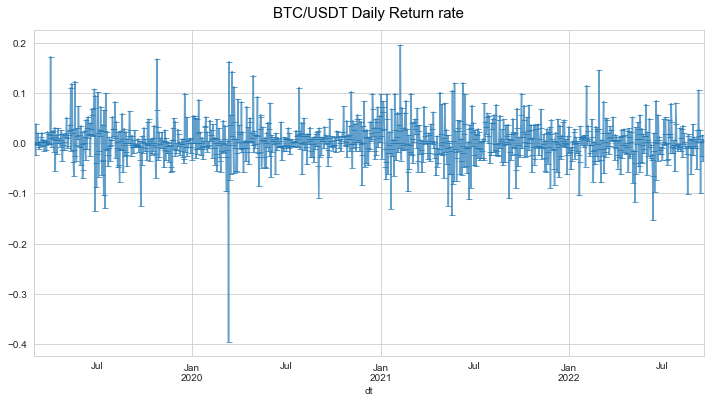

In [13]:
#created a daily return column
BTC['Daily Return'] = BTC.close.pct_change()

#plotted a chart of daily return
BTC['Daily Return'].plot(figsize=(12,6),marker='_', alpha=0.7)
plt.title('BTC/USDT Daily Return rate', fontsize=15,y=1.02, color='black')

Avg_daily_ret = BTC['Daily Return'].mean()


print('1.  The max daily return information is below ↓:')
print('\n')

print(BTC[BTC['Daily Return']== BTC['Daily Return'].max()].iloc[0:,[0,1,2,-1]])

print('\n')
print('2.  The worst daily return information is below  ↓:')

print('\n')
print(BTC[BTC['Daily Return']== BTC['Daily Return'].min()].iloc[0:,[0,1,2,-1]])

print('\n')
print('3.  The Average daily return is: {}'.format(round(Avg_daily_ret,5)))


1.  The max daily return information is below ↓:


               open    high      low  Daily Return
dt                                                
2021-05-24  2096.63  2675.0  2079.94      0.263329


2.  The worst daily return information is below  ↓:


              open    high    low  Daily Return
dt                                             
2020-03-12  194.61  195.55  101.2     -0.445969


3.  The Average daily return is: 0.00307


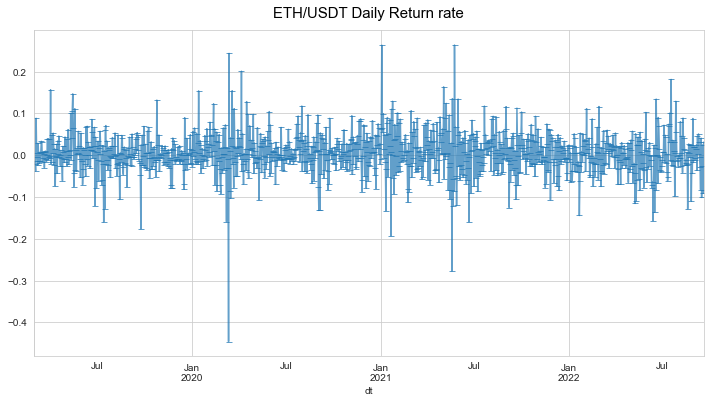

In [14]:
# created daily return column 
ETH['Daily Return'] = ETH.close.pct_change()

# plotted daily return 
ETH['Daily Return'].plot(figsize=(12,6),marker='_', alpha=0.7)
plt.title('ETH/USDT Daily Return rate', fontsize=15, color='black', y=1.02)

ETH_Avg_ret = ETH['Daily Return'].mean()
return_max = ETH['Daily Return'].max()
return_min = ETH['Daily Return'].min()


print('1.  The max daily return information is below ↓:')
print('\n')

print(ETH[ETH['Daily Return']== ETH['Daily Return'].max()].iloc[0:,[0,1,2,-1]])

print('\n')
print('2.  The worst daily return information is below  ↓:')

print('\n')
print(ETH[ETH['Daily Return']== ETH['Daily Return'].min()].iloc[0:,[0,1,2,-1]])

print('\n')
print('3.  The Average daily return is: {}'.format(round(ETH_Avg_ret,5)))

.

#### Explore the relationship between the Crypto assets

There is a perfect correlation between the daily rates of ETH and BTC


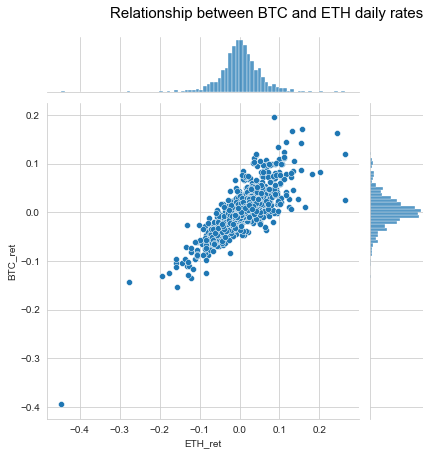

In [15]:
## Grabbed return rates of cryptos and put them in Dataframe
ETH_ret = DataFrame(ETH['Daily Return'])
BTC_ret  =DataFrame(BTC['Daily Return'])

#merged the Dataframes into rets
rets = ETH_ret.merge(BTC_ret, on = 'dt')

#renamed columns 
rets.rename(columns={'Daily Return_x': 'ETH_ret', 'Daily Return_y': 'BTC_ret' }, inplace=True)


#plot the relationship between the daily rate of BTC and ETH
sns.jointplot('ETH_ret', 'BTC_ret', rets, kind ='scatter')
plt.title('Relationship between BTC and ETH daily rates',fontsize=15, loc='right', y=1.25,color='black')

 
print('There is a perfect correlation between the daily rates of ETH and BTC')

There is a positive correlation between the daily close prices of BTC and ETH


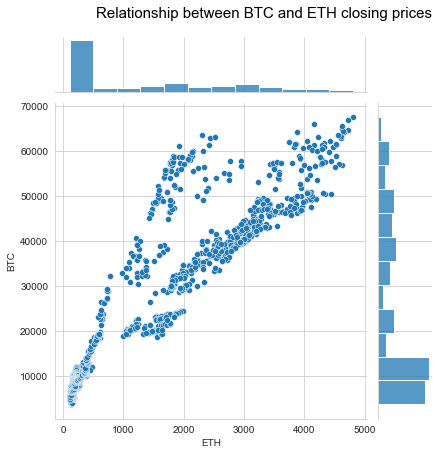

In [16]:
# Grabbed closing price of cryptos and put them in Dataframe

ETH_cl = DataFrame(get_crypto_data('ETH/USDT', start, end)['close'])
BTC_cl = DataFrame(get_crypto_data('BTC/USDT', start, end)['close'])

#Merged the Dataframes into closing_price
closing_price = BTC_cl.merge(ETH_cl, on='dt')

#renamed columns 
closing_price.rename(columns={'close_x':'BTC', 'close_y':'ETH'}, inplace=True)


#plotted the relationship between the daily close of BTC and ETH
sns.jointplot('ETH', 'BTC', closing_price, kind ='scatter')
plt.title('Relationship between BTC and ETH closing prices',fontsize=15,loc='right',  y=1.25, color='black')

print('There is a positive correlation between the daily close prices of BTC and ETH')

In [17]:
''' Analysing at the relationships between the daily returns of 
BTC 
ETH 
XRP 
ADA and 
BNB 
'''

#took the close price of all the crypto assets 
BTC_c = get_crypto_data('BTC/USDT', start, end, exchange='binance')['close']
ETH_c = get_crypto_data('ETH/USDT', start, end, exchange='binance')['close']
XRP_c = get_crypto_data('XRP/USDT', start, end, exchange='binance')['close']
BNB_c = get_crypto_data('BNB/USDT', start, end, exchange='binance')['close']
CADANO_c = get_crypto_data('ADA/USDT', start, end, exchange='binance')['close']

#concatenated the close prices 
close_df = pd.concat([BTC_c,ETH_c,XRP_c,BNB_c,CADANO_c], axis = 1)
close_df.columns = ['BTC_c','ETH_c','XRP_c', 'BNB_c', 'CADANO_c']


In [18]:
#got the daily rates of all closing prices
crypto_rets = close_df.pct_change()

# changed column names
crypto_rets.columns=['BTC_ret', 'ETH_ret', 'XRP_ret', 'BNB_ret', 'ADA_ret']

crypto_rets.head()

,BTC_ret,ETH_ret,XRP_ret,BNB_ret,ADA_ret
dt,,,,,
2019-03-01,NaN,NaN,NaN,NaN,NaN
2019-03-02,-0.000803,-0.020396,-0.005766,0.039386,-0.013488
2019-03-03,-0.003189,-0.014786,-0.008540,-0.025985,-0.008487
2019-03-04,-0.024279,-0.037902,-0.029151,-0.004410,-0.043747
2019-03-05,0.038336,0.088102,0.041845,0.194928,0.067131


BTC and ETH seem to be the most correlated in terns of daily rate 


<Figure size 720x432 with 0 Axes>

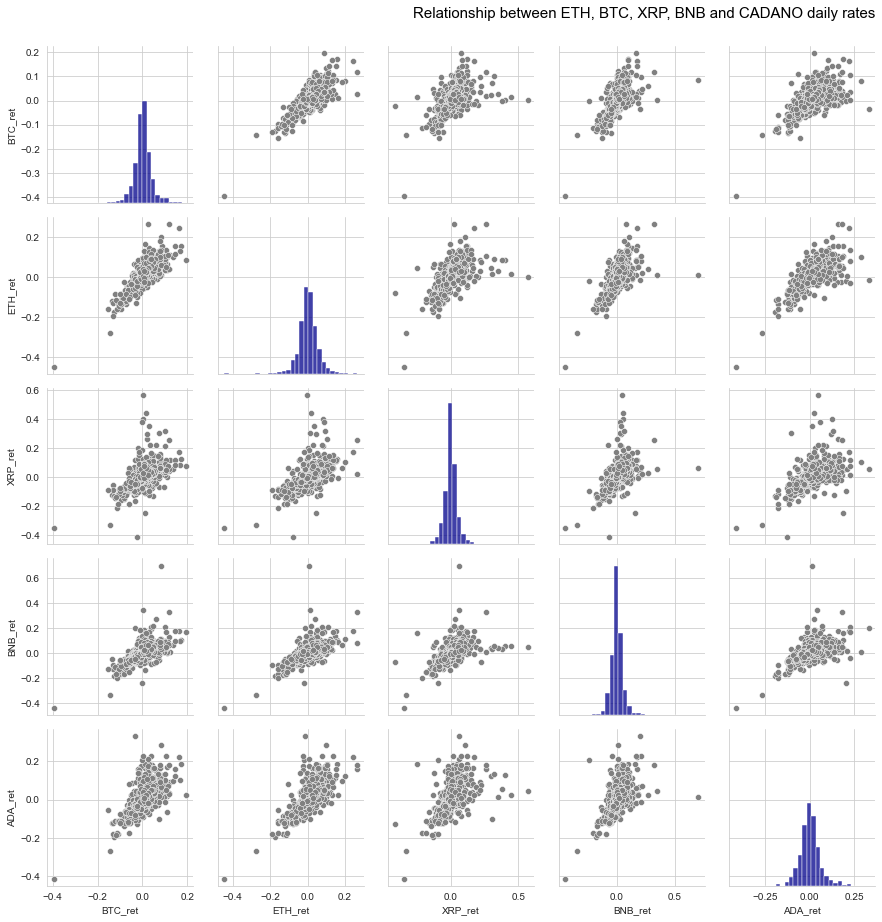

In [19]:
# plotted PairGrid to find the relationships between assets 
plt.figure(figsize=(10,6))

#set up pairgrid chart 
returns = sns.PairGrid(crypto_rets)
returns.map_lower(sns.scatterplot, color='grey')
returns.map_upper(sns.scatterplot, color='grey')
returns.map_diag(sns.histplot,bins=30, color='darkblue')


plt.title('Relationship between ETH, BTC, XRP, BNB and CADANO daily rates', fontsize=15, color='black',
         y=5.5, loc='right')

print('BTC and ETH seem to be the most correlated in terns of daily rate ')


The heatmap below gives an even clearer view of the correlation between the daily rates of these crypto assets, 

BTC/USDT and ETH/USDT have the strongest correlation. 


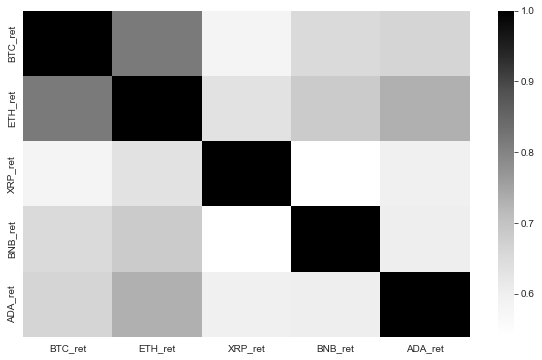

In [20]:
plt.figure(figsize=(10,6))
corr = crypto_rets.corr()
sns.heatmap(corr, cmap='Greys')

print('The heatmap below gives an even clearer view of the correlation between the daily rates of these crypto assets, \n')
print('BTC/USDT and ETH/USDT have the strongest correlation. ')

##### Which of the cryptos had the highest daily rate?

In [21]:
print(crypto_rets.max().sort_values(ascending=False))
print('\n')
print('BNB/USDT and XRP/USDT have the ranked top 2 with the highest daily returns')

BNB_ret    0.703021
XRP_ret    0.568469
ADA_ret    0.331680
ETH_ret    0.263329
BTC_ret    0.195361
dtype: float64


BNB/USDT and XRP/USDT have the ranked top 2 with the highest daily returns


### RISK ANALYSIS 

In [22]:
#remove deplicates from the crypto returns dataframe

crypto_rets = crypto_rets.dropna()
crypto_rets.head()

,BTC_ret,ETH_ret,XRP_ret,BNB_ret,ADA_ret
dt,,,,,
2019-03-02,-0.000803,-0.020396,-0.005766,0.039386,-0.013488
2019-03-03,-0.003189,-0.014786,-0.008540,-0.025985,-0.008487
2019-03-04,-0.024279,-0.037902,-0.029151,-0.004410,-0.043747
2019-03-05,0.038336,0.088102,0.041845,0.194928,0.067131
2019-03-06,0.001065,0.004974,0.005020,0.066542,-0.009553


In [23]:
# I used standard deviation as my risk factor which shows deviation from returns 

#mean of daily rates 
crypto_rets_mean = crypto_rets.mean()

#std of daily rates
crypto_rets_std = crypto_rets.std()


BTC/USDT has a low risk as well as low return and that could be as a result of the high price 

ETH/USDT is below average risk and has a moderately high return 

XRP/USDT, ADA/USDT, BNB/USDT have very high risk, I recommend traders should trade carefully


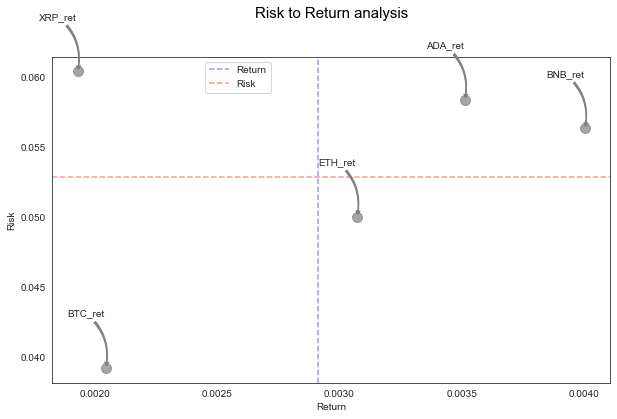

In [24]:
#ploted the risk against reward for all assets 
plt.figure(figsize=(10,6))
sns.set_style('white')
plt.scatter(crypto_rets_mean,crypto_rets_std, s=100, color='grey', alpha=0.7)

# set average lines 
plt.axvline(crypto_rets_mean.mean(),c='blue', alpha=0.4, label='Return', linestyle='--' )
plt.axhline(crypto_rets_std.mean(), c='red', alpha=0.4, label='Risk', linestyle='--')

# set chart title
plt.title('Risk to Return analysis', y=1.1, fontsize=15, color='black')

# set legend
plt.legend(bbox_to_anchor=(0.4, 1))

# set axis label
plt.xlabel('Return')
plt.ylabel('Risk')


# annotated the scatter plot
for label, x, y in zip(crypto_rets.columns, crypto_rets_mean, crypto_rets_std):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 50),
        textcoords = 'offset points', ha = 'center', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy,head_length=0.4,head_width=0.4,tail_width=0.2', 
                          connectionstyle = 'arc3,rad=-0.3', color='grey'))
    
print('BTC/USDT has a low risk as well as low return and that could be as a result of the high price \n') 
print('ETH/USDT is below average risk and has a moderately high return \n')
print('XRP/USDT, ADA/USDT, BNB/USDT have very high risk, I recommend traders should trade carefully')

#### Conclusion

BTC/USDT and ETH/USDT are the most correlated pairs in terms of how they close daily and daily rate. They are as well the safest assets to invest in as they have low risk to reward.